In [145]:
import pandas as pd
import numpy as np
import seaborn as sns #visualisation
import matplotlib.pyplot as plt #visualisation
import pandas as pd
import pandas_profiling
from collections import defaultdict
%matplotlib inline 
sns.set(color_codes=True)

In [146]:
import os
# change the current directory 
# to specified directory 
#pwd

In [147]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [148]:
df = pd.read_csv('dataset.csv')
# To display the top 5 rows
df.head(5)
df.tail(5)

,domain_userid,domain_sessionid,tstamp,duration,marketing_channel,location_name,clickouts,bookings,revenue
0,0585a82a-100f-4c18-bab9-bf1b7d798f73,0076924a-62cd-432e-b179-99b0fc3bc42a,2019-01-01T23:00:00Z,141,SEM,Hockenheim,2,0,0.617814
1,5f6c2ac7-c42e-4abf-98ce-6c37a0529422,000a85fc-3763-4747-9e8f-7c0ebe2e0c96,2018-12-31T23:00:00Z,309,Other,Sedona,0,0,0.000000
2,81aa334c-d60c-409f-a108-6b929b0076dc,be7b7161-39a7-4359-b5d9-1785f5049cf0,2019-01-06T23:00:00Z,856,Remarketing,Świnoujście,1,0,0.390730
3,26bb30b7-0717-49a3-a56d-058bb9a4387a,0135ac1a-bb1d-4f4f-9f20-8be0872b97dc,2019-01-03T23:00:00Z,5,Other,NaN,0,0,0.000000
4,17b2cdb0-8593-4016-b1f8-c4176027dc72,00375696-f7a6-4a77-8cf7-6a201949bb5f,2019-01-03T23:00:00Z,135,Display,Abkhazia,0,0,0.000000


,domain_userid,domain_sessionid,tstamp,duration,marketing_channel,location_name,clickouts,bookings,revenue
810547,e578fc6a-b7a4-4090-aa58-9625db4128dc,63836aef-d5d9-4aea-bb30-b758923fe110,2019-06-09T22:00:00Z,81,Brand,NaN,0,0,0.000000
810548,8a6973bb-c42e-41e4-9eda-60c38b0259e6,01606ed7-735a-4877-ac1e-29f34907a201,2019-07-09T22:00:00Z,20,SEO,NaN,0,0,0.000000
810549,c34693a0-55d2-4f99-ba86-d6bfdea6661b,51ef774d-2a43-4ae0-a5c3-779e0582a74b,2019-07-04T22:00:00Z,554,Remarketing,Sylt,5,0,1.299584
810550,44603039-50c5-49a8-b7e6-2640c5d518b3,0103dc16-3d30-4d55-87b8-538f066be179,2019-07-09T22:00:00Z,2,SEM,France,0,0,0.000000
810551,ba06c462-acd0-4565-b4f8-8d67d6656907,0107d7d9-cd47-4e7b-ba34-d093b5cd08ca,2019-07-05T22:00:00Z,5,SEM,Bryansk,0,0,0.000000


In [149]:
df.info()
df.describe()
df.median()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 810552 entries, 0 to 810551
Data columns (total 9 columns):
domain_userid        810552 non-null object
domain_sessionid     810552 non-null object
tstamp               810552 non-null object
duration             810552 non-null int64
marketing_channel    810552 non-null object
location_name        661602 non-null object
clickouts            810552 non-null int64
bookings             810552 non-null int64
revenue              810552 non-null float64
dtypes: float64(1), int64(3), object(5)
memory usage: 55.7+ MB


,duration,clickouts,bookings,revenue
count,8.105520e+05,810552.000000,810552.000000,810552.000000
mean,4.689545e+02,1.019801,0.004361,0.427652
std,4.900880e+03,2.574266,0.074424,2.095898
min,0.000000e+00,0.000000,0.000000,-1.870546
25%,1.400000e+01,0.000000,0.000000,0.000000
50%,1.040000e+02,0.000000,0.000000,0.000000
75%,4.000000e+02,1.000000,0.000000,0.359428
max,2.939660e+06,217.000000,9.000000,177.472508


duration     104.0
clickouts      0.0
bookings       0.0
revenue        0.0
dtype: float64

In [150]:
df.dtypes

domain_userid         object
domain_sessionid      object
tstamp                object
duration               int64
marketing_channel     object
location_name         object
clickouts              int64
bookings               int64
revenue              float64
dtype: object

In [151]:
#df.profile_report()

In [152]:
# Total number of rows and columns
df.shape
# Rows containing duplicate data
duplicate_rows_df = df[df.duplicated()]
print('number of duplicate rows: ', duplicate_rows_df.shape)

(810552, 9)

number of duplicate rows:  (0, 9)


In [153]:
df.count() 

domain_userid        810552
domain_sessionid     810552
tstamp               810552
duration             810552
marketing_channel    810552
location_name        661602
clickouts            810552
bookings             810552
revenue              810552
dtype: int64

In [154]:
# Finding the null values.
print(df.isnull().sum())

domain_userid             0
domain_sessionid          0
tstamp                    0
duration                  0
marketing_channel         0
location_name        148950
clickouts                 0
bookings                  0
revenue                   0
dtype: int64


In [155]:
# location name of the first search is nt possible to classify. So I will probably drip this column
df['location_name'].unique()

array(['Hockenheim', 'Sedona', 'Świnoujście', ..., 'Milton of Campsie',
       'Laurinburg', 'Rhynern'], dtype=object)

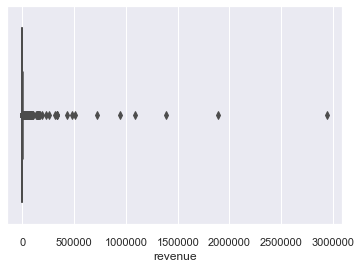

In [156]:
sns.boxplot(x=df['duration'])
sns.boxplot(x=df['clickouts'])
sns.boxplot(x=df['bookings'])
sns.boxplot(x=df['revenue'])

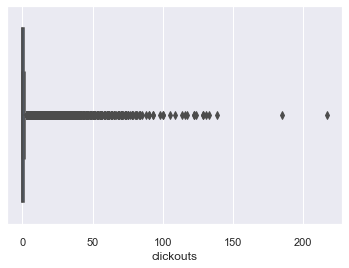

In [157]:
sns.boxplot(x=df['clickouts'])

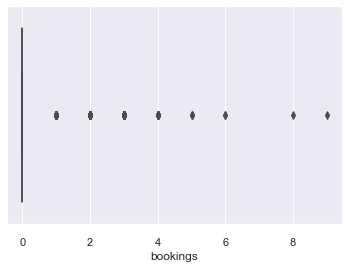

In [158]:
sns.boxplot(x=df['bookings'])

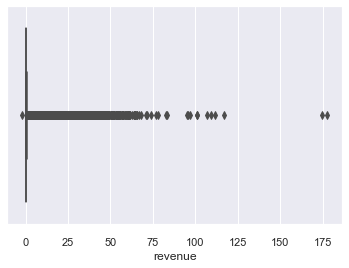

In [159]:
sns.boxplot(x=df['revenue'])

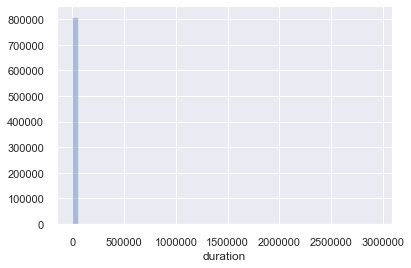

In [160]:
sns.distplot(df['duration'].dropna(), kde = False)

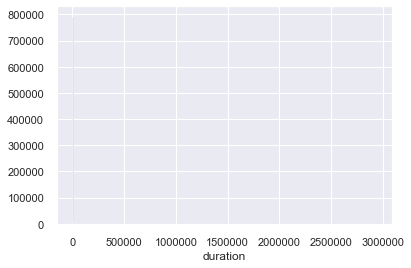

In [161]:
sns.distplot(df['duration'].dropna(), bins = 1000, kde = False)

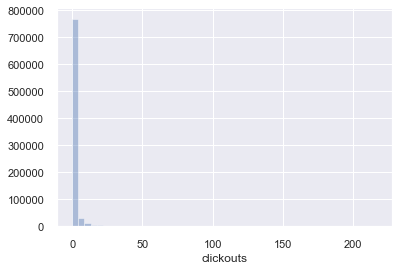

In [162]:
sns.distplot(df['clickouts'].dropna(), kde = False)

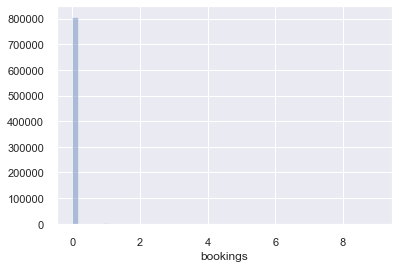

In [163]:
sns.distplot(df['bookings'].dropna(), kde = False)

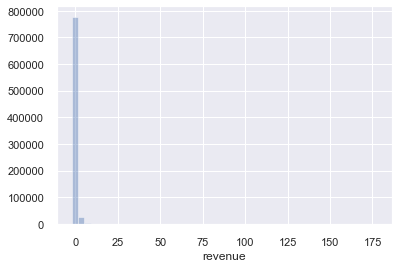

In [164]:
sns.distplot(df['revenue'].dropna(), kde = False)

### Channel Attribution Markov chains

In [165]:
df['purchase'] = df['revenue'].apply(lambda x: 1 if x > 0 else 0)

In [166]:
df.head()

,domain_userid,domain_sessionid,tstamp,duration,marketing_channel,location_name,clickouts,bookings,revenue,purchase
0,0585a82a-100f-4c18-bab9-bf1b7d798f73,0076924a-62cd-432e-b179-99b0fc3bc42a,2019-01-01T23:00:00Z,141,SEM,Hockenheim,2,0,0.617814,1
1,5f6c2ac7-c42e-4abf-98ce-6c37a0529422,000a85fc-3763-4747-9e8f-7c0ebe2e0c96,2018-12-31T23:00:00Z,309,Other,Sedona,0,0,0.000000,0
2,81aa334c-d60c-409f-a108-6b929b0076dc,be7b7161-39a7-4359-b5d9-1785f5049cf0,2019-01-06T23:00:00Z,856,Remarketing,Świnoujście,1,0,0.390730,1
3,26bb30b7-0717-49a3-a56d-058bb9a4387a,0135ac1a-bb1d-4f4f-9f20-8be0872b97dc,2019-01-03T23:00:00Z,5,Other,NaN,0,0,0.000000,0
4,17b2cdb0-8593-4016-b1f8-c4176027dc72,00375696-f7a6-4a77-8cf7-6a201949bb5f,2019-01-03T23:00:00Z,135,Display,Abkhazia,0,0,0.000000,0


In [167]:
df['interaction'] = "session"

In [168]:
df['tstamp'] = pd.to_datetime(df['tstamp']) #.str.strip(), format='%Y/%m/%d')

In [169]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 810552 entries, 0 to 810551
Data columns (total 11 columns):
domain_userid        810552 non-null object
domain_sessionid     810552 non-null object
tstamp               810552 non-null datetime64[ns, UTC]
duration             810552 non-null int64
marketing_channel    810552 non-null object
location_name        661602 non-null object
clickouts            810552 non-null int64
bookings             810552 non-null int64
revenue              810552 non-null float64
purchase             810552 non-null int64
interaction          810552 non-null object
dtypes: datetime64[ns, UTC](1), float64(1), int64(4), object(5)
memory usage: 68.0+ MB


In [170]:
df = df.sort_values(['domain_userid', 'tstamp'],
                    ascending=[False, True])
df['visit_order'] = df.groupby('domain_userid').cumcount() + 1

In [171]:
df.head()

,domain_userid,domain_sessionid,tstamp,duration,marketing_channel,location_name,clickouts,bookings,revenue,purchase,interaction,visit_order
183537,ffffbbde-1c27-4c5f-b914-4a457aab7274,00edd11f-a8dc-46fe-93c6-84dbd6ca7978,2019-03-15 23:00:00+00:00,140,SEM,Fabrègues,1,0,0.402459,1,session,1
116344,ffffa639-a087-4a6b-ad81-08ab5a59cd26,01821608-fbba-49f8-bfb8-139a5b43fe6d,2019-02-07 23:00:00+00:00,797,SEM,Costa Rica,0,0,0.000000,0,session,1
460630,ffffa639-a087-4a6b-ad81-08ab5a59cd26,4e9a6a1f-b1fb-4d6a-a676-3e7010e3477d,2019-02-07 23:00:00+00:00,6,Brand,Costa Rica,0,0,0.000000,0,session,2
782871,ffffa3f1-c242-4115-98d7-40fb4373e086,005c4970-013a-4893-bdad-8808ec7463ed,2019-07-02 22:00:00+00:00,354,SEO,Pescantina,0,0,0.000000,0,session,1
349454,ffff6403-3bba-48de-a34f-95556e18563c,00965983-53c3-4449-a900-346d384a2ce2,2019-03-04 23:00:00+00:00,475,SEM,Turkey,1,0,0.438251,1,session,1


In [172]:
df_paths = df.groupby('domain_userid')['marketing_channel'].aggregate(
    lambda x: x.unique().tolist()).reset_index()
    
df_last_interaction = df.drop_duplicates('domain_userid', keep='last')[['domain_userid', 'purchase']]
df_paths = pd.merge(df_paths, df_last_interaction, how='left', on='domain_userid')

### Creating a path dataframe with user journeys
Merging a list and not list column!!!

In [175]:
df_paths['EndPath'] = df_paths['purchase'].apply(lambda x: 'Null' if x ==0 else 'Purchase')

In [176]:
df_paths['StartPath'] = 'Start'

In [177]:
df_paths['path']=[x[1] + [x[3]] for x in df_paths.values.tolist()]

In [178]:
df_paths['path']=[[x[4]] + x[5] for x in df_paths.values.tolist()]

In [180]:
df_paths.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500000 entries, 0 to 499999
Data columns (total 6 columns):
domain_userid        500000 non-null object
marketing_channel    500000 non-null object
purchase             500000 non-null int64
EndPath              500000 non-null object
StartPath            500000 non-null object
path                 500000 non-null object
dtypes: int64(1), object(5)
memory usage: 26.7+ MB


In [181]:
df_paths = df_paths[['domain_userid', 'path']]

In [182]:
df_paths.head()

,domain_userid,path
0,000004b3-0060-4470-8040-0d3280a024d9,"[Start, Brand, Null]"
1,00000750-a0ae-4db5-af47-eb09bd22cfb5,"[Start, Other, Purchase]"
2,00000c04-7060-4c61-8090-170570b0e8b8,"[Start, SEO, Null]"
3,00000d9b-9c88-41a4-91c7-8df212ec5cae,"[Start, Brand, Null]"
4,00000e9b-7804-4575-b6f9-dcd0bcd74504,"[Start, Display, Purchase]"


In [142]:
df_paths.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500000 entries, 0 to 499999
Data columns (total 2 columns):
domain_userid    500000 non-null object
path             500000 non-null object
dtypes: object(2)
memory usage: 11.4+ MB


### Markov Chains

In [183]:
list_of_paths = df_paths['path']
total_conversions = sum(path.count('Purchase') for path in df_paths['path'].tolist())
base_conversion_rate = total_conversions / len(list_of_paths)

In [184]:
base_conversion_rate

0.365166

In [202]:
list_of_paths

0               [Start, Brand, Null]
1           [Start, Other, Purchase]
2                 [Start, SEO, Null]
3               [Start, Brand, Null]
4         [Start, Display, Purchase]
                     ...            
499995        [Start, SEM, Purchase]
499996     [Start, SEM, Other, Null]
499997            [Start, SEO, Null]
499998     [Start, SEM, Brand, Null]
499999        [Start, SEM, Purchase]
Name: path, Length: 500000, dtype: object

In [196]:
list_of_unique_channels = set(x for element in list_of_paths for x in element)

In [197]:
list_of_unique_channels

{'Brand',
 'Display',
 'Null',
 'Other',
 'Purchase',
 'Remarketing',
 'SEM',
 'SEO',
 'Start'}

In [198]:
transition_states = {x + '>' + y: 0 for x in list_of_unique_channels for y in list_of_unique_channels}

In [199]:
transition_states

{'Brand>Brand': 0,
 'Brand>Purchase': 0,
 'Brand>SEO': 0,
 'Brand>Display': 0,
 'Brand>Start': 0,
 'Brand>Remarketing': 0,
 'Brand>Other': 0,
 'Brand>SEM': 0,
 'Brand>Null': 0,
 'Purchase>Brand': 0,
 'Purchase>Purchase': 0,
 'Purchase>SEO': 0,
 'Purchase>Display': 0,
 'Purchase>Start': 0,
 'Purchase>Remarketing': 0,
 'Purchase>Other': 0,
 'Purchase>SEM': 0,
 'Purchase>Null': 0,
 'SEO>Brand': 0,
 'SEO>Purchase': 0,
 'SEO>SEO': 0,
 'SEO>Display': 0,
 'SEO>Start': 0,
 'SEO>Remarketing': 0,
 'SEO>Other': 0,
 'SEO>SEM': 0,
 'SEO>Null': 0,
 'Display>Brand': 0,
 'Display>Purchase': 0,
 'Display>SEO': 0,
 'Display>Display': 0,
 'Display>Start': 0,
 'Display>Remarketing': 0,
 'Display>Other': 0,
 'Display>SEM': 0,
 'Display>Null': 0,
 'Start>Brand': 0,
 'Start>Purchase': 0,
 'Start>SEO': 0,
 'Start>Display': 0,
 'Start>Start': 0,
 'Start>Remarketing': 0,
 'Start>Other': 0,
 'Start>SEM': 0,
 'Start>Null': 0,
 'Remarketing>Brand': 0,
 'Remarketing>Purchase': 0,
 'Remarketing>SEO': 0,
 'Remarketin

In [206]:
def transition_states(list_of_paths):
    list_of_unique_channels = set(x for element in list_of_paths for x in element)
    transition_states = {x + '>' + y: 0 for x in list_of_unique_channels for y in list_of_unique_channels}

    for possible_state in list_of_unique_channels:
        if possible_state not in ['Purchase', 'Null']:
            for user_path in list_of_paths:
                if possible_state in user_path:
                    indices = [i for i, s in enumerate(user_path) if possible_state in s]
                    for col in indices:
                        transition_states[user_path[col] + '>' + user_path[col + 1]] += 1

    return transition_states


In [207]:
trans_states = transition_states(list_of_paths)

In [209]:
trans_states 

{'Brand>Brand': 0,
 'Brand>Purchase': 24333,
 'Brand>SEO': 613,
 'Brand>Display': 153,
 'Brand>Start': 0,
 'Brand>Remarketing': 978,
 'Brand>Other': 6305,
 'Brand>SEM': 1880,
 'Brand>Null': 38600,
 'Purchase>Brand': 0,
 'Purchase>Purchase': 0,
 'Purchase>SEO': 0,
 'Purchase>Display': 0,
 'Purchase>Start': 0,
 'Purchase>Remarketing': 0,
 'Purchase>Other': 0,
 'Purchase>SEM': 0,
 'Purchase>Null': 0,
 'SEO>Brand': 1070,
 'SEO>Purchase': 15438,
 'SEO>SEO': 0,
 'SEO>Display': 106,
 'SEO>Start': 0,
 'SEO>Remarketing': 1078,
 'SEO>Other': 3988,
 'SEO>SEM': 2051,
 'SEO>Null': 38403,
 'Display>Brand': 310,
 'Display>Purchase': 11961,
 'Display>SEO': 114,
 'Display>Display': 0,
 'Display>Start': 0,
 'Display>Remarketing': 3149,
 'Display>Other': 1513,
 'Display>SEM': 1114,
 'Display>Null': 24815,
 'Start>Brand': 61738,
 'Start>Purchase': 0,
 'Start>SEO': 55831,
 'Start>Display': 40427,
 'Start>Start': 0,
 'Start>Remarketing': 13588,
 'Start>Other': 82353,
 'Start>SEM': 246063,
 'Start>Null': 0,


In [208]:
def transition_prob(trans_dict):
    list_of_unique_channels = set(x for element in list_of_paths for x in element)
    trans_prob = defaultdict(dict)
    for state in list_of_unique_channels:
        if state not in ['Purchase', 'Null']:
            counter = 0
            index = [i for i, s in enumerate(trans_dict) if state + '>' in s]
            for col in index:
                if trans_dict[list(trans_dict)[col]] > 0:
                    counter += trans_dict[list(trans_dict)[col]]
            for col in index:
                if trans_dict[list(trans_dict)[col]] > 0:
                    state_prob = float((trans_dict[list(trans_dict)[col]])) / float(counter)
                    trans_prob[list(trans_dict)[col]] = state_prob

    return trans_prob


trans_prob = transition_prob(trans_states)

##### the probability of moving from one channel to another channel is called transition probability

In [210]:
trans_prob

defaultdict(dict,
            {'Brand>Purchase': 0.3339600889352475,
             'Brand>SEO': 0.008413164612555242,
             'Brand>Display': 0.002099860009332711,
             'Brand>Remarketing': 0.013422634569460076,
             'Brand>Other': 0.08653344678982186,
             'Brand>SEM': 0.025802201421865994,
             'Brand>Null': 0.5297686036617166,
             'SEO>Brand': 0.017220845269900538,
             'SEO>Purchase': 0.2484629993240416,
             'SEO>Display': 0.0017059902790742588,
             'SEO>Remarketing': 0.017349599253226898,
             'SEO>Other': 0.06418386068819004,
             'SEO>SEM': 0.03300930247529533,
             'SEO>Null': 0.6180674027102714,
             'Display>Brand': 0.007213328369322413,
             'Display>Purchase': 0.2783181310498883,
             'Display>SEO': 0.0026526433358153387,
             'Display>Remarketing': 0.0732734549516009,
             'Display>Other': 0.035205696202531646,
             'Display>SEM': 

In [211]:
def transition_matrix(list_of_paths, transition_probabilities):
    trans_matrix = pd.DataFrame()
    list_of_unique_channels = set(x for element in list_of_paths for x in element)

    for channel in list_of_unique_channels:
        trans_matrix[channel] = 0.00
        trans_matrix.loc[channel] = 0.00
        trans_matrix.loc[channel][channel] = 1.0 if channel in ['Purchase', 'Null'] else 0.0

    for key, value in transition_probabilities.items():
        origin, destination = key.split('>')
        trans_matrix.at[origin, destination] = value

    return trans_matrix


trans_matrix = transition_matrix(list_of_paths, trans_prob)

<Figure size 1080x720 with 0 Axes>

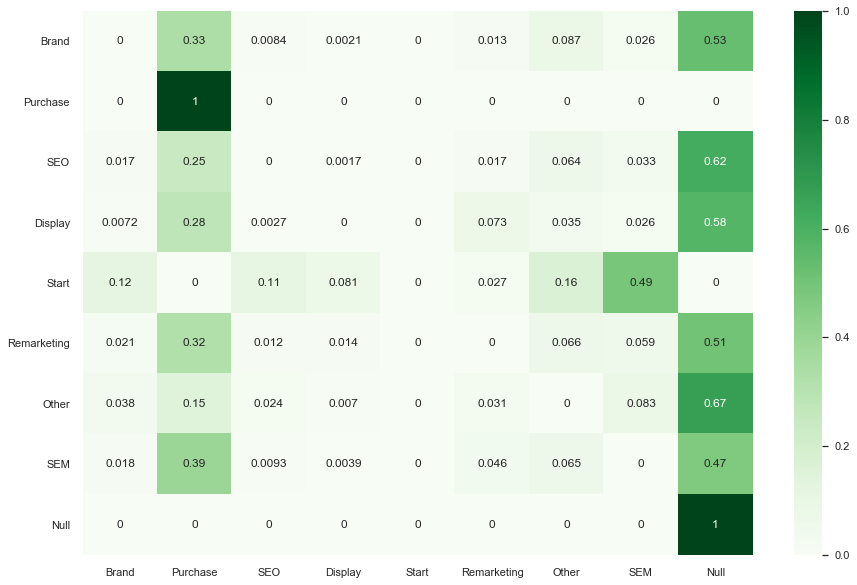

In [228]:
import matplotlib.cm as cm
cmap = cm.get_cmap('Greens')
plt.figure(figsize=(15,10))
sns.heatmap(trans_matrix, annot=True, cmap = cmap) #'coolwarm')

In [230]:
def removal_effects(df, conversion_rate):
    removal_effects_dict = {}
    channels = [channel for channel in df.columns if channel not in ['Start',
                                                                     'Null',
                                                                     'Purchase']]
    for channel in channels:
        removal_df = df.drop(channel, axis=1).drop(channel, axis=0)
        for column in removal_df.columns:
            row_sum = np.sum(list(removal_df.loc[column]))
            null_pct = float(1) - row_sum
            if null_pct != 0:
                removal_df.loc[column]['Null'] = null_pct
            removal_df.loc['Null']['Null'] = 1.0

        removal_to_conv = removal_df[
            ['Null', 'Purchase']].drop(['Null', 'Purchase'], axis=0)
        removal_to_non_conv = removal_df.drop(
            ['Null', 'Purchase'], axis=1).drop(['Null', 'Purchase'], axis=0)

        removal_inv_diff = np.linalg.inv(
            np.identity(
                len(removal_to_non_conv.columns)) - np.asarray(removal_to_non_conv))
        removal_dot_prod = np.dot(removal_inv_diff, np.asarray(removal_to_conv))
        removal_cvr = pd.DataFrame(removal_dot_prod,
                                   index=removal_to_conv.index)[[1]].loc['Start'].values[0]
        removal_effect = 1 - removal_cvr / conversion_rate
        removal_effects_dict[channel] = removal_effect

    return removal_effects_dict


removal_effects_dict = removal_effects(trans_matrix, base_conversion_rate)

#### Removal effect principle says that if we want to find the contribution of each channel in the customer journey, we can do so by removing each channel and see how many conversions are happening without that channel being in place.

In [231]:
removal_effects_dict

{'Brand': 0.14789726785154378,
 'SEO': 0.09857599360050673,
 'Display': 0.07717690865280469,
 'Remarketing': 0.0705236543174893,
 'Other': 0.13442869366566956,
 'SEM': 0.618586312747569}

In [232]:
def markov_chain_allocations(removal_effects, total_conversions):
    re_sum = np.sum(list(removal_effects.values()))

    return {k: (v / re_sum) * total_conversions for k, v in removal_effects.items()}


attributions = markov_chain_allocations(removal_effects_dict, total_conversions)

In [233]:
attributions

{'Brand': 23538.868345213697,
 'SEO': 15689.04800655339,
 'Display': 12283.236319770802,
 'Remarketing': 11224.325089419928,
 'Other': 21395.252042056087,
 'SEM': 98452.27019698608}

In [234]:
df_attr = pd.DataFrame([attributions]) 

In [235]:
sns.df_attr.

,Brand,SEO,Display,Remarketing,Other,SEM
0,23538.868345,15689.048007,12283.23632,11224.325089,21395.252042,98452.270197


<Figure size 720x576 with 0 Axes>

Text(0, 10, '23538.87')

Text(0, 10, '15689.05')

Text(0, 10, '12283.24')

Text(0, 10, '11224.33')

Text(0, 10, '21395.25')

Text(0, 10, '98452.27')

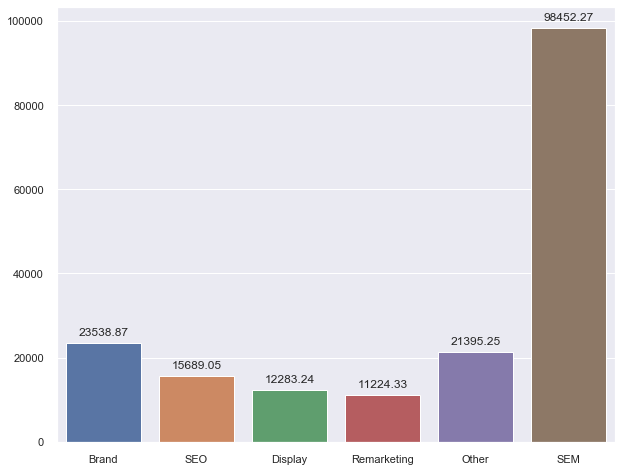

In [244]:
plt.figure(figsize=(10,8))
splot  = sns.barplot(data=df_attr)
    
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.2f'),\
                   (p.get_x() + p.get_width() / 2., \
                    p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
